In [98]:
from utils import * 
from algorithms import *
from agents import *

# parameters
disclosure = ['step'];
numStates = 6;
depth = 1

# game setup
numRounds, numPeriods, numSteps, numBuyers, numSellers, numTokens, gameTypes, seed = 5000, 1, 16, 4, 4, 4, '1111', None
gameData = [gameTypes, numBuyers, numSellers, numTokens, numRounds, numPeriods, numSteps, seed]

# algo params
episodeLength = 16
numTrajectories = 10
gamma=0.99
std_init = 0.7
std_decay = 0.995
std_min = 0.05
lr = 0.0003
k = -0.15
p = 0.3

# agents
buyers = [
    Reinforcer(gameData, disclosure, index=0, buyer=1, reinforcer=1, verbose =0, numStates = numStates, algo='VPGContinuous',algoArgs = [numStates, episodeLength, numTrajectories, gamma, std_init, std_decay, std_min, lr, k, p]),
    Reinforcer(gameData, disclosure, index=1, buyer=1, reinforcer=1, verbose =0, numStates = numStates, algo='VPGContinuous',algoArgs = [numStates, episodeLength, numTrajectories, gamma, std_init, std_decay, std_min, lr, k, p]),
    Reinforcer(gameData, disclosure, index=2, buyer=1, reinforcer=1, verbose =0, numStates = numStates, algo='VPGContinuous',algoArgs = [numStates, episodeLength, numTrajectories, gamma, std_init, std_decay, std_min, lr, k, p]),
    Reinforcer(gameData, disclosure, index=3, buyer=1, reinforcer=1, verbose =0, numStates = numStates, algo='VPGContinuous',algoArgs = [numStates, episodeLength, numTrajectories, gamma, std_init, std_decay, std_min, lr, k, p]),
         ]
sellers = [
    Reinforcer(gameData, disclosure, index=0, buyer=0, reinforcer=1, verbose =0, numStates = numStates, algo='VPGContinuous',algoArgs = [numStates, episodeLength, numTrajectories, gamma, std_init, std_decay, std_min, lr, k, p]),
    Reinforcer(gameData, disclosure, index=1, buyer=0, reinforcer=1, verbose =0, numStates = numStates, algo='VPGContinuous',algoArgs = [numStates, episodeLength, numTrajectories, gamma, std_init, std_decay, std_min, lr, k, p]),
    Reinforcer(gameData, disclosure, index=2, buyer=0, reinforcer=1, verbose =0, numStates = numStates, algo='VPGContinuous',algoArgs = [numStates, episodeLength, numTrajectories, gamma, std_init, std_decay, std_min, lr, k, p]),
    Reinforcer(gameData, disclosure, index=3, buyer=0, reinforcer=1, verbose =0, numStates = numStates, algo='VPGContinuous',algoArgs = [numStates, episodeLength, numTrajectories, gamma, std_init, std_decay, std_min, lr, k, p]),
         ]


# logging
log = Log(gameData, disclosure,depth)
printInterval1, printInterval2, cnt, bprofits_history, sprofits_history, bidder_bids, bidder_profits = 100, 300, 0, [], [], [], []

# training loop
bprofits, sprofits = 0.0, 0.0
for rnd in range(numRounds):
    print(rnd, bprofits, sprofits)
    startRounds(gameData, log, buyers, sellers, rnd)
    bprofits, sprofits = 0.0, 0.0
    for period in range(numPeriods):
        startPeriods(buyers, sellers)
        for step in range(numSteps):

            # start step
            startSteps(buyers, sellers)

            # reset state
            for i in range(numBuyers):
                buyers[i].state = log.generateState(buyers[i], cnt, numStates)
                sellers[i].state = log.generateState(sellers[i], cnt, numStates)

            # bid-ask
            bids, asks = collectOffers(buyers, sellers)
            currentAsk, currentAskIdx, currentBid, currentBidIdx = bestOffers(bids, asks)
            price, buy, sell = trade(buyers, sellers, currentAsk, currentAskIdx, currentBid, currentBidIdx)

            # transact
            bprofit, sprofit = 0, 0
            if price > 0:
                buyers[currentBidIdx].transact(price)
                sellers[currentAskIdx].transact(price)
                bprofit = buyers[currentBidIdx].stepProfits
                sprofit = sellers[currentAskIdx].stepProfits

            # record
            bprofits += buyers[0].stepProfits
            sprofits += sellers[0].stepProfits
            log.addStep([rnd, period, step, currentBid, currentAsk,  buy, sell, price, price>0,
                         currentBidIdx==0, currentBidIdx==1, currentBidIdx==2, currentBidIdx==3, 
                         currentAskIdx==0, currentAskIdx==1, currentAskIdx==2, currentAskIdx==3, 
                         bids[0], bids[1], bids[2], bids[3], 
                         asks[0], asks[1], asks[2], asks[3], 
                         bprofit, sprofit])

            # end step
            observe(buyers, sellers, log.disclose())
            endSteps(buyers, sellers)

            # update state
            for i in range(numBuyers):
                buyers[i].newState = log.generateState(buyers[i], cnt, numStates)
                sellers[i].newState = log.generateState(sellers[i], cnt, numStates)

            # terminate period
            if step == numSteps - 1:
                for i in range(numBuyers):
                    buyers[i].done = True   
                    sellers[i].done = True                  
            else:
                for i in range(numBuyers):
                    buyers[i].done = False
                    sellers[i].done = False                  

            agentsObserve(buyers, sellers)
            agentsTrain(buyers, sellers)
            cnt+=1
        endPeriods(buyers, sellers)
    endRounds(buyers, sellers)

0 0.0 0.0
1 51.160035437024305 41.6178342121433
2 67.06614299322537 46.553575806189706
3 93.97125247418178 43.03722419254612
4 49.9106094983113 77.55182332834357
5 67.63611700711353 26.0531036302823
6 47.22149465764838 85.75950740877028
7 87.0999485567603 38.83660188072678
8 60.84340463343668 38.95608647151566
9 87.18994279115529 51.44679836674133
10 24.828631561800634 80.07911906709788
11 63.582976264963804 61.36033350148715
12 92.3394040767779 60.05486967297456
13 74.35801094106748 27.08585409891173
14 26.394580018975944 39.13099609273558
15 27.445967787162445 96.75786215760891
16 61.57185291055313 46.94888075884827
17 65.52855745331354 94.20920878891965
18 34.760707528568574 71.75791112521705
19 126.39449487690207 -33.3207072018409
20 61.8851588758459 55.52480998656915
21 70.18870325338723 51.361250246462575
22 52.76171231784336 60.38295538344681
23 56.11081537231375 69.3997808740572
24 60.54811482606111 50.79317836955479
25 85.62528212174367 53.22445796003764
26 34.2478385676296 -1

### analysis

In [99]:
log.findCurrentTraders()

log.stepData['tprofit'] = log.stepData['bprofit'] + log.stepData['sprofit'] 
df = log.stepData[['tprofit','rnd']].groupby('rnd').sum()

print(df.mean(), df.std())

for i in range(4):
    var = 'bids_' + str(i)
    var2 = 'asks_' + str(i)
    log.stepData[var]=log.stepData[var].round(2)
    log.stepData[var2]=log.stepData[var2].round(2)

log.stepData['bids'] = log.stepData[['bids_0', 'bids_1', 'bids_2', 'bids_3']].apply(list, axis=1)
log.stepData['asks'] = log.stepData[['asks_0', 'asks_1', 'asks_2', 'asks_3']].apply(list, axis=1)

tprofit    477.250804
dtype: float64 tprofit    33.689987
dtype: float64


In [100]:
log.stepData.to_csv('nodisc_step.csv')
log.roundData.to_csv('nodisc_round.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


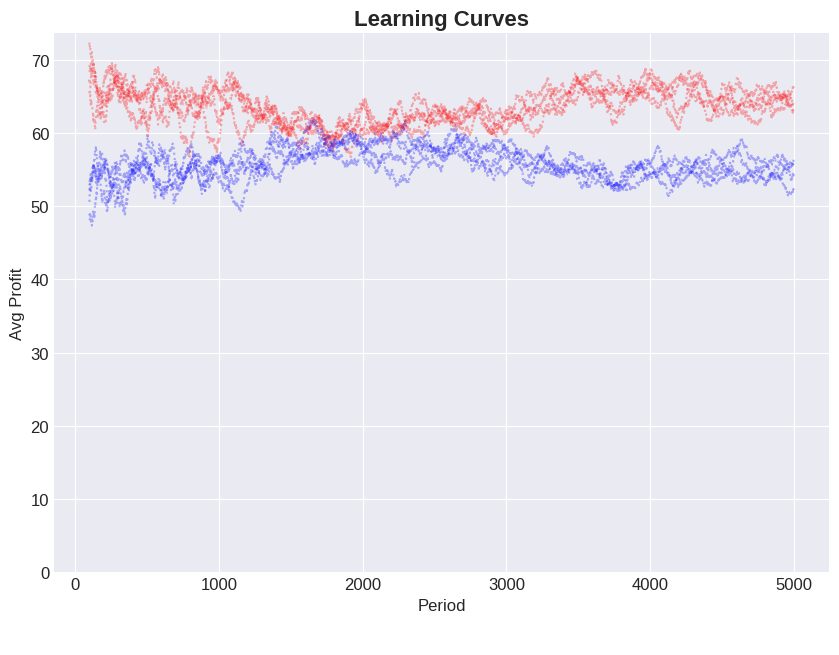

In [132]:
log.findCurrentTraders()
log.graphLearning(rolling_window = 100, trackBuyersIdx=[], trackSellersIdx=[], type = 'rnd')

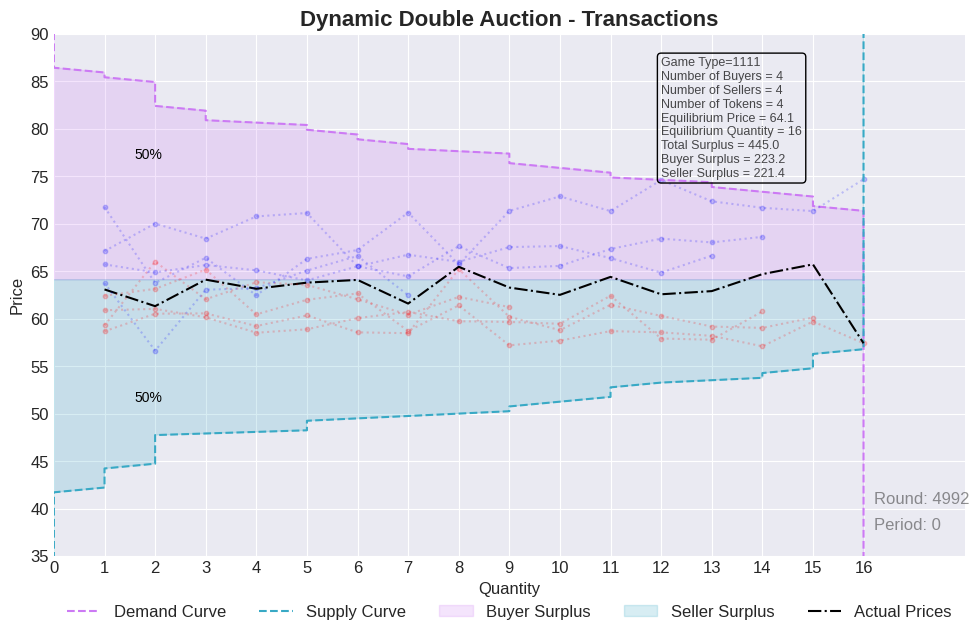

In [131]:
period = 1
log.graphSales(rnd-7, period-1, trackBuyersIdx=[], trackSellersIdx=[])

### Last 100 Rounds

In [114]:
df = log.stepData[log.stepData.rnd>(rnd-100)]
df_rnd = log.roundData[log.roundData.rnd>(rnd-100)]

In [115]:
df.columns

Index(['rnd', 'period', 'step', 'currentBid', 'currentAsk', 'buy', 'sell',
       'price', 'sale', 'currentBidIdx_0', 'currentBidIdx_1',
       'currentBidIdx_2', 'currentBidIdx_3', 'currentAskIdx_0',
       'currentAskIdx_1', 'currentAskIdx_2', 'currentAskIdx_3', 'bids_0',
       'bids_1', 'bids_2', 'bids_3', 'asks_0', 'asks_1', 'asks_2', 'asks_3',
       'bprofit', 'sprofit', 'currentBidIdx', 'currentAskIdx', 'tprofit',
       'bids', 'asks'],
      dtype='object')

### Efficiency

In [116]:
x = np.array(df.groupby('rnd').tprofit.sum().values)
y = np.array(df_rnd.totalSurplus)
df_rnd['EFF'] = x/y
df_rnd['EFF'].describe()

count    100.000000
mean       0.993942
std        0.010631
min        0.951370
25%        0.988636
50%        0.999550
75%        1.000195
max        1.001093
Name: EFF, dtype: float64

In [122]:
x = np.array(df.groupby('rnd').bprofit.sum().values)
y = np.array(df_rnd.buyerSurplus)
df_rnd['EFF'] = x/y
df_rnd['EFF'].describe()

count    100.000000
mean       1.057139
std        0.121691
min        0.751315
25%        0.995686
50%        1.047305
75%        1.127653
max        1.508140
Name: EFF, dtype: float64

In [123]:
x = np.array(df.groupby('rnd').sprofit.sum().values)
y = np.array(df_rnd.sellerSurplus)
df_rnd['EFF'] = x/y
df_rnd['EFF'].describe()

count    100.000000
mean       0.956644
std        0.142370
min        0.699856
25%        0.869885
50%        0.931718
75%        1.001904
max        1.606266
Name: EFF, dtype: float64

### Dispersion

In [119]:
x = df[['rnd', 'price']]
x.groupby('rnd').std().mean(), x.groupby('rnd').std().std()

(price    1.537565
 dtype: float64,
 price    0.568447
 dtype: float64)

In [109]:
x = df[['rnd', 'price']]
y = df_rnd[['rnd', 'peq']]
z = pd.merge(x, y, on='rnd')
z['dev'] = z['price'].sub(z['peq']).abs()
z.groupby('rnd').mean().mean()

price    63.769011
peq      64.543000
dev       1.990796
dtype: float64

In [120]:
z.groupby('rnd').mean().std()

price    0.719011
peq      2.141332
dev      0.992315
dtype: float64

In [121]:
autocorr_by_round = df.groupby('rnd')['price'].apply(lambda x: x.autocorr(lag=1))
x = pd.merge(df, autocorr_by_round.reset_index(name='autocorr'), on='rnd')
x.autocorr.mean(), x.autocorr.std()

(0.0889279058349807, 0.2955413570394622)

### Switching

In [112]:
buyer_switch_mask = df['currentBidIdx'].ne(df['currentBidIdx'].shift())
seller_switch_mask = df['currentAskIdx'].ne(df['currentAskIdx'].shift())
buyer_switch_count = df.groupby('rnd')['period'].apply(lambda x: (buyer_switch_mask & (x == x.shift())).sum())
seller_switch_count = df.groupby('rnd')['period'].apply(lambda x: (seller_switch_mask & (x == x.shift())).sum())

print("Number of buyer switches within each round:")
print(np.mean(buyer_switch_count)/16)

print("\nNumber of seller switches within each round:")
print(np.mean(seller_switch_count)/16)

Number of buyer switches within each round:
0.605

Number of seller switches within each round:
0.6075
